In [1]:
import warnings
warnings.filterwarnings('ignore')

from time import time
from datetime import timedelta

import pandas as pd
import seaborn as sns
import numpy as np


from dython.nominal import associations
from dython.nominal import correlation_ratio
from dython.nominal import cramers_v

from scipy.stats import chi2_contingency 
from scipy.stats import pearsonr 


from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.preprocessing import minmax_scale

from sklearn.svm import LinearSVR, SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from matplotlib import pyplot as plt 

sns.set()

<AxesSubplot:xlabel='quality', ylabel='Count'>

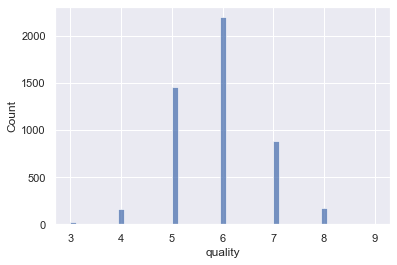

In [2]:
wine_data = pd.read_csv('winequality_white.csv')
sns.histplot(x='quality',data=wine_data)

In [3]:
wine_data = pd.read_csv('wine2.csv') #wine2.csv conté el dataset dels vins amb les transformacions fetes en R per aconseguir unes dades el més normals possibles
wine_data.columns = [c.lower().strip().replace(' ','_').replace('/','_').replace('-','_') for c in wine_data.columns] 
wine_data.head()

,unnamed:_0,fixed.acidity.transf,volatile.acidity.transf,citric.acid.transf,residual.sugar.transf,chlorides.transf,free.sulfur.dioxide.transf,total.sulfur.dioxide.transf,ph.transf,sulphates.transf,alcohol.transf,quality
0,1,0.213585,0.144656,0.357964,2.548338,0.241205,0.663225,0.777880,-1.285300,-0.241592,-1.489492,6
1,2,-0.682967,0.470955,0.175975,-1.024397,0.506724,-1.438332,-0.109400,0.777149,0.146366,-0.830558,6
2,3,1.490757,0.257521,0.693977,0.200942,0.568189,-0.221971,-0.996058,0.518757,-0.345653,-0.299631,6
3,4,0.456880,-0.355936,-0.016820,0.511954,1.002477,0.770309,1.133584,0.054891,-0.794952,-0.473380,6
4,5,0.456880,-0.355936,-0.016820,0.511954,1.002477,0.770309,1.133584,0.054891,-0.794952,-0.473380,6


In [4]:
wine_data.drop('unnamed:_0', inplace=True, axis=1)
wine_data

,fixed.acidity.transf,volatile.acidity.transf,citric.acid.transf,residual.sugar.transf,chlorides.transf,free.sulfur.dioxide.transf,total.sulfur.dioxide.transf,ph.transf,sulphates.transf,alcohol.transf,quality
0,0.213585,0.144656,0.357964,2.548338,0.241205,0.663225,0.777880,-1.285300,-0.241592,-1.489492,6
1,-0.682967,0.470955,0.175975,-1.024397,0.506724,-1.438332,-0.109400,0.777149,0.146366,-0.830558,6
2,1.490757,0.257521,0.693977,0.200942,0.568189,-0.221971,-0.996058,0.518757,-0.345653,-0.299631,6
3,0.456880,-0.355936,-0.016820,0.511954,1.002477,0.770309,1.133584,0.054891,-0.794952,-0.473380,6
4,0.456880,-0.355936,-0.016820,0.511954,1.002477,0.770309,1.133584,0.054891,-0.794952,-0.473380,6
...,...,...,...,...,...,...,...,...,...,...,...
4714,-0.817293,-0.642122,-0.329372,-1.024397,-0.229335,-0.631796,-1.129857,0.583801,0.236944,0.604053,6
4715,-0.289697,0.669802,0.357964,0.416492,0.378102,1.277202,0.732742,-0.217113,-0.140501,-0.740014,5
4716,-0.419213,-0.222590,-1.664915,-1.144043,-0.061324,-0.221971,-0.631697,-1.359367,-0.140501,-0.921964,6
4717,-1.808016,0.366190,-0.221803,-1.175448,-2.458528,-0.931531,-0.657258,1.030869,-1.042177,1.785374,7


In [50]:
from collections import Counter

import numpy as np

from sklearn.model_selection import train_test_split


#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_data['quality'], test_size = 0.25, stratify=wine_data['quality'])


#X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.3, stratify=y_train)

#X keeps all the atributes of the instances
#y keeps the target atribute

print(Counter(y_train))
print(Counter(y_test)) 
#print(Counter(y_vali))

Counter({6: 1605, 5: 1042, 7: 650, 8: 128, 4: 102, 3: 8, 9: 4})
Counter({6: 535, 5: 348, 7: 217, 8: 42, 4: 34, 3: 3, 9: 1})


In [39]:
X_tr, y_tr = X_train.iloc[:, :-1], y_train
X_te, y_te = X_test.iloc[:, :-1], y_test
#X_val, y_val = X_vali.iloc[:, :-1], y_vali

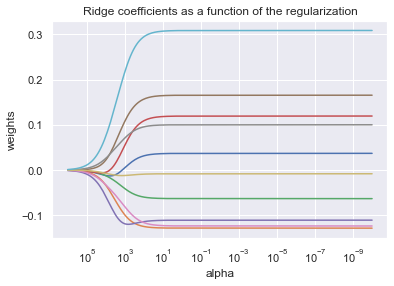

18.041864093920754

In [7]:
#Ridge reg
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import RidgeCV


# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, 6, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_tr, y_tr)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
ridgecv = RidgeCV(alphas).fit(X_tr,y_tr)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()
#reg.alpha_
ridgecv.alpha_

In [8]:
ridgecv.coef_

array([-0.02805462, -0.16174014,  0.00134877,  0.12818248, -0.05068876,
        0.13960471, -0.05496168,  0.03097544,  0.03222167,  0.42146661])

In [ ]:
#SUPPORT VECTOR REGRESSION
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K)
svr.fit(X_tr, y_tr)

# Checking the score for all parameters
print("Grid scores on training set:")
means = svr.cv_results_['mean_test_score']
stds = svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

print(grid.best_estimator_)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,scoring='r2')
grid.fit(X_tr,y_tr)
print(grid.best_estimator_)

In [ ]:
#SVR AMB KERNEL GAUSSIA: C=10 GAMMA=1
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C = 10, gamma = 1)
regressor.fit(X_tr, y_tr)

In [9]:
#TENINT EN COMPTE LES MÈTRIQUES ESPECIFICADES AL TREBALL
def comptue_metrics(y_pred, y_real):
    r2 = r2_score(y_real,y_pred)
    mse = mean_squared_error(y_real, y_pred)
    median_abs_e = median_absolute_error(y_pred, y_real)
    mean_abs_e = mean_absolute_error(y_pred, y_real)
    return [r2, mse, median_abs_e, mean_abs_e]

results = pd.DataFrame(columns=['Kernel', 'C', 'epsilon', 'R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])

In [12]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.3, stratify=y_train)
X_tr, y_tr = X_train.iloc[:, :-1], y_train
X_te, y_te = X_test.iloc[:, :-1], y_test
X_val, y_val = X_vali.iloc[:, :-1], y_vali

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
KNN,-,-,-,0.349955,0.496129,0.4,0.535484


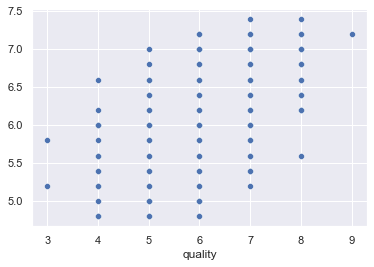

In [13]:
knn = KNeighborsRegressor() #KNN

knn.fit(X_tr,y_tr)
y_pred = knn.predict(X_val)



results.loc['KNN', :] = ['-', '-', '-'] + comptue_metrics(y_pred,y_val)

sns.scatterplot(y_val, y_pred)
results

0.2867517426243078
pred [5.40107308 6.11206808 6.12972507 5.71183834 5.80500094 5.45391212
 5.25308298 5.49580092 5.82775026 6.5368044  5.66387159 5.89472257
 6.19967493 5.60799921 6.25768284 6.5507113  5.32906247 6.13210948
 6.28709098 5.49135542 5.9647373  6.49425007 4.4823002  5.86742103
 6.38718695 6.25305731 5.83818565 6.41330674 5.98502496 6.32935367
 5.75913355 5.63347733 6.39913777 6.2637682  5.16945999 6.65802687
 6.04861927 4.74841215 5.921634   5.76894616 5.81705786 6.24623242
 6.11323221 5.43059806 5.36333827 5.73412632 5.48478536 6.10015795
 5.42217523 5.54103064 5.20839464 5.80729035 6.21058384 6.13663639
 5.71119172 5.61499074 5.82666326 6.0033984  5.41088802 5.86228028
 5.60395282 5.86452063 6.3176471  5.64816528 5.90204029 6.66049318
 6.11942596 6.08344993 6.82963701 6.07500955 6.07675806 5.78690007
 6.51859808 5.98984821 5.40081555 5.87529965 6.3944869  5.93391731
 5.10296966 5.15945821 5.50669804 6.2731629  5.55960467 5.66808815
 6.03167934 5.63841042 6.9164914  5.90

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
KNN,-,-,-,0.349955,0.496129,0.4,0.535484
LinearSVR-default,linear,1,0,0.286752,0.544367,0.466488,0.568511


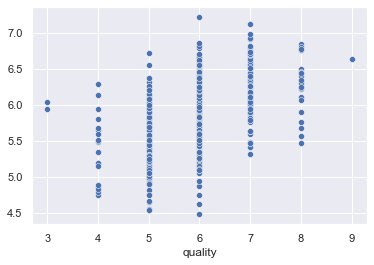

In [14]:
svm = LinearSVR()

svm.fit(X_tr,y_tr)
y_pred = svm.predict(X_val)

print(r2_score(np.array(y_val),y_pred))


print('pred',y_pred)
print('val',np.array(y_val))
results.loc['LinearSVR-default', :] = ['linear',1,0] + comptue_metrics(y_pred,np.array(y_val))

sns.scatterplot(y_val, y_pred)

results

In [15]:
for i in range(len(y_pred)):
    y_pred[i] = int(round(y_pred[i], 0))

In [25]:
y_value = np.array(y_val)

In [26]:
counter = 0
for i in range(len(y_pred)):
    print(y_pred[i], y_value[i])
    if y_pred[i] == y_value[i]:
        print('T')
        counter = counter+1
print(counter)

5.0 6
6.0 8
6.0 7
6.0 5
6.0 6
T
5.0 5
T
5.0 5
T
5.0 5
T
6.0 6
T
7.0 6
6.0 6
T
6.0 5
6.0 6
T
6.0 7
6.0 7
7.0 6
5.0 5
T
6.0 6
T
6.0 6
T
5.0 5
T
6.0 7
6.0 7
4.0 6
6.0 5
6.0 6
T
6.0 6
T
6.0 5
6.0 6
T
6.0 6
T
6.0 7
6.0 5
6.0 7
6.0 6
T
6.0 7
5.0 5
T
7.0 7
T
6.0 6
T
5.0 6
6.0 6
T
6.0 8
6.0 6
T
6.0 6
T
6.0 7
5.0 6
5.0 5
T
6.0 6
T
5.0 7
6.0 7
5.0 5
T
6.0 6
T
5.0 5
T
6.0 5
6.0 6
T
6.0 4
6.0 6
T
6.0 5
6.0 6
T
6.0 7
5.0 6
6.0 6
T
6.0 5
6.0 5
6.0 8
6.0 4
6.0 6
T
7.0 6
6.0 6
T
6.0 6
T
7.0 6
6.0 5
6.0 6
T
6.0 5
7.0 7
T
6.0 7
5.0 5
T
6.0 7
6.0 7
6.0 5
5.0 5
T
5.0 6
6.0 6
T
6.0 6
T
6.0 5
6.0 5
6.0 7
6.0 5
7.0 7
T
6.0 6
T
6.0 4
6.0 3
6.0 8
5.0 5
T
6.0 6
T
7.0 8
6.0 6
T
6.0 6
T
6.0 6
T
6.0 4
6.0 6
T
6.0 6
T
6.0 6
T
6.0 7
7.0 6
6.0 7
5.0 5
T
6.0 6
T
7.0 8
6.0 5
6.0 5
5.0 7
6.0 5
5.0 5
T
6.0 5
7.0 6
6.0 5
7.0 6
5.0 4
5.0 7
6.0 6
T
6.0 6
T
6.0 6
T
7.0 7
T
6.0 5
6.0 6
T
6.0 7
6.0 6
T
5.0 5
T
7.0 6
5.0 4
6.0 6
T
6.0 7
6.0 6
T
6.0 7
6.0 5
6.0 6
T
7.0 7
T
5.0 5
T
7.0 7
T
5.0 5
T
5.0 5
T
6.0 6
T
6.0 6
T
6.0 6
T


In [ ]:
for i in range(len(y_pred)): #provem si la precisio millora amb el round
    y_pred[i] = int(round(y_pred[i], 0))
    
print(y_pred)

In [ ]:
#cv per trobar els millors parametres pel kernel lineal
cv_results = pd.DataFrame(columns=['Kernel', 'C', 'epsilon', 'R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])

Cs = [10,20,30,40,50,60]
epsilons = [0.001,0.0001,0.00001,0.000001,0]
for c in Cs:
    for epsilon in epsilons:
        svm = SVR(kernel='linear', C=c,epsilon=epsilon)
        svm.fit(X_tr,y_tr)
        y_pred = svm.predict(X_val)
        cv_results.loc['LinearSVR-{}-{}'.format(c,epsilon), :] = ['linear', c, epsilon] + comptue_metrics(y_pred,y_val)
        
best = cv_results.sort_values(by='R2',ascending=False).iloc[0,:]
results.loc['LinearSVR-best',:] = best

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
KNN,-,-,-,0.349955,0.496129,0.4,0.535484
LinearSVR-default,linear,1,0,0.286752,0.544367,0.466488,0.568511
RBF-SVR-default,RBF,1,0,0.35727,0.490546,0.420817,0.52543


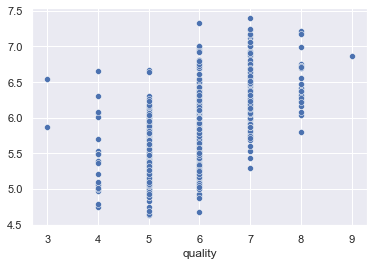

In [27]:
#provem el kernel gaussia
svr = SVR(kernel='rbf')
svr.fit(X_tr,y_tr)
y_pred = svr.predict(X_val)

results.loc['RBF-SVR-default', :] = ['RBF',1,0]+ comptue_metrics(y_pred,y_val)

sns.scatterplot(y_val, y_pred)
results

In [28]:
cv_results_rbf = pd.DataFrame(columns=['Kernel', 'C', 'epsilon', 'R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])

Cs = [10,20,30,40,50,60]
epsilons = [0.001,0.0001,0.00001,0.000001,0]
for c in Cs:
    for epsilon in epsilons:
        svm = SVR(kernel='rbf', C=c,epsilon=epsilon)
        svm.fit(X_tr,y_tr)
        y_pred = svm.predict(X_val)
        cv_results_rbf.loc['RBFSVR-{}-{}'.format(c,epsilon), :] = ['RBF', c, epsilon] + comptue_metrics(y_pred,y_val)
        
best = cv_results_rbf.sort_values(by='R2',ascending=False).iloc[0,:]
results.loc['RBFSVR-best',:] = best


cv_results_rbf

SyntaxError: invalid syntax (Temp/ipykernel_11028/3458232478.py, line 1)

In [ ]:
#CLASSIFICACIÓ 1-VS-ALL

In [ ]:
#Uncomment to upgrade packages
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install graphviz 
!{sys.executable} -m pip install dython

#load_ext autoreload

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from time import time
from datetime import timedelta

import pandas as pd
import seaborn as sns
import numpy as np
import scipy

from dython.nominal import associations
from dython.nominal import correlation_ratio
from dython.nominal import cramers_v

from scipy.stats import chi2_contingency 
from scipy.stats import pearsonr 


from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.preprocessing import minmax_scale

from sklearn.svm import LinearSVR, SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from matplotlib import pyplot as plt 

sns.set()

In [ ]:
# One-vs-All Classification Using Logistic Regression 
wine_data = pd.read_csv('wine.csv')
wine_data.columns = [c.lower().strip().replace(' ','_').replace('/','_').replace('-','_') for c in wine_data.columns] 
wine_data.head()

wine_data['quality'] = wine_data['quality'].replace([0, 1, 2, 3, 4], 1)
wine_data['quality'] = wine_data['quality'].replace([5, 6, 7], 2)
wine_data['quality'] = wine_data['quality'].replace([8, 9, 10], 3)

In [ ]:
# One-vs-the-rest (OvR) multiclass strategy.
!{sys.executable} -m pip install sklearn
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

print(wine_data.quality)

X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_data['quality'], test_size = 0.3, stratify=wine_data['quality'])
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.3, stratify=y_train)

clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
print(clf)
pred = clf.predict(X_train)
print(pred)
print("Training accuracy:", str(100 * np.mean(pred == y_train)) + "%")

In [ ]:
pred = clf.predict(X_test)
print("Test accuracy:", str(100 * np.mean(pred == y_test)) + "%")

In [ ]:
#MLP, fora del temari del curs
#investigació pròpia per donar un bon model

In [48]:
def preprocessing(X_train, X_test):
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    pca = PCA().fit(X_train)

    n_components =(pca.explained_variance_ratio_.cumsum() < 0.99).sum()
    
    pca = PCA(n_components=n_components).fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    return X_train_pca, X_test_pca


X_train, X_test =  preprocessing(X_tr, X_te)

In [51]:
results_df = pd.DataFrame(columns=['Accuracy', 'Recall (mean)','F1-score (mean)', 'Time(s)'])
results_df

,Accuracy,Recall (mean),F1-score (mean),Time(s)


In [52]:
init_time = time()
model_nnet = MLPClassifier(hidden_layer_sizes=[6],
                               alpha=0.01,
                               activation='logistic',
                               max_iter=200,
                               solver='lbfgs')
model_nnet.fit(X_train,y_train);
training_time = time()-init_time
print(timedelta(seconds=training_time))

scores = cross_val_score(model_nnet, X_train, y_train, cv=5)
scores_recall = cross_val_score(model_nnet, X_train, y_train, cv=5,scoring='recall_macro')
scores_f_score = cross_val_score(model_nnet, X_train, y_train, cv=5,scoring='f1_macro')
results_df.loc['MLP',:] = [np.mean(scores),np.mean(scores_recall),np.mean(scores_f_score),training_time]
results_df

0:00:00.659367


,Accuracy,Recall (mean),F1-score (mean),Time(s)
MLP,0.988133,0.67619,0.662423,0.659367


In [53]:
y_pred = model_nnet.predict(X_test) #corroborar si l'accuracy de train obtingut és tan bo perquè està overfitted el model o no

In [43]:
y_test
y_pred

array([5, 6, 6, ..., 6, 6, 7], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.92      1.00      0.96        34
           5       1.00      1.00      1.00       348
           6       1.00      1.00      1.00       535
           7       1.00      1.00      1.00       217
           8       0.98      1.00      0.99        42
           9       0.00      0.00      0.00         1

    accuracy                           1.00      1180
   macro avg       0.70      0.71      0.71      1180
weighted avg       0.99      1.00      0.99      1180

